# Financial Product Recommendation - Part 3

## Tables of Content

1. [Introduction](#1)
2. [Libraries](#2)
3. [Data Set](#3)
4. [EDA - Key Insights](#4)
5. [Preprocessing - Key Columns](#5)
6. [Feature Engineering](#6)
7. [Train Test Split](#7)
8. [Machine Learning Intro](#8)
    - [8.1 ML K Nearest Neighbours ](#8.1)
    - [8.2 ML - Logistic Regression ](#8.2)
    - [8.3 ML - Decision Tree ](#8.3)
    - [8.4 ML - Key Findings ](#8.4)
    - [8.5 ML - Drawbacks / Next Steps ](#8.5)



## 1. Introduction<a id="1"></a>

In this notebook, We will preprocess the Columns based on Key insights what we found during the EDA process and try three different types of ML Alorithms to check how each one is Behaving 

## 2. Libraries<a id="2"></a>

In [1]:
import numpy as np
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import seaborn as sn
import os

#Stats
from scipy.stats import chi2_contingency,ttest_ind
import scipy.stats as stats
import statsmodels.api as sm

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




## 3. Data Set<a id="3"></a>

In [2]:
#loading Cleaning DataSet from the first notebook
data = pd.read_csv('/Users/bhargavdevarapalli/Downloads/Brainstation_capstone_Census/data/census_modified.csv')

print('Displaying top 10 Records : - ')
data.head(10)

Displaying top 10 Records : - 


,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,STATE-GOV,BACHELORS,13.0,NEVER-MARRIED,ADM-CLERICAL,NOT-IN-FAMILY,WHITE,MALE,2174.0,0.0,40.0,UNITED-STATES,0
1,1,50,SELF-EMP-NOT-INC,BACHELORS,13.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,0.0,0.0,13.0,UNITED-STATES,0
2,2,38,PRIVATE,HS-GRAD,9.0,DIVORCED,HANDLERS-CLEANERS,NOT-IN-FAMILY,WHITE,MALE,0.0,0.0,40.0,UNITED-STATES,0
3,3,53,PRIVATE,11TH,7.0,MARRIED-CIV-SPOUSE,HANDLERS-CLEANERS,HUSBAND,BLACK,MALE,0.0,0.0,40.0,UNITED-STATES,0
4,4,28,PRIVATE,BACHELORS,13.0,MARRIED-CIV-SPOUSE,PROF-SPECIALTY,WIFE,BLACK,FEMALE,0.0,0.0,40.0,CUBA,0
5,5,37,PRIVATE,MASTERS,14.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,WIFE,WHITE,FEMALE,0.0,0.0,40.0,UNITED-STATES,0
6,6,49,PRIVATE,9TH,5.0,MARRIED-SPOUSE-ABSENT,OTHER-SERVICE,NOT-IN-FAMILY,BLACK,FEMALE,0.0,0.0,16.0,JAMAICA,0
7,7,52,SELF-EMP-NOT-INC,HS-GRAD,9.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,0.0,0.0,45.0,UNITED-STATES,1
8,8,31,PRIVATE,MASTERS,14.0,NEVER-MARRIED,PROF-SPECIALTY,NOT-IN-FAMILY,WHITE,FEMALE,14084.0,0.0,50.0,UNITED-STATES,1
9,9,42,PRIVATE,BACHELORS,13.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,5178.0,0.0,40.0,UNITED-STATES,1


## 4. Key Insights <a id="4"></a>

    1)  Target Column (Income) is imbalanced
    
    2)  Most People work for Private Sector. Self Employed People has >50% change of having Higher Income (>50K)
    
    3)  Captial Gain column has outliers and if the Gain is >5k there is a 80 % of Higer Income(> 50K)
    
    4)  Males tend to earn more than Women in terms of Higher Income
    
    5)  Married People have better chance of having Higher Income
    
    6)  Occupations like (Executives and Professionals) will have higher chance of earning >50 K
    
    7)  People with Higer degress( Bachelors and Above) will have higher chance of earning >50 K
    
    8)  Looks like there is no significant Correlation between All the Numerical Columns and therefore we will have to keep all the three Columns - Age, Educational-Number,Hours-per-Week
    
    9) Tested the above mentioned point through Logistic Regression model and found same three columns to be effective
    
    10) Hours Worked has a significant impact on the Income 
    
    11) Men tend to get paided higher compared to Women
 

## 5. Preprocessing - Key Columns <a id="5"></a>

In the Below process we will pick up Key important Columns and transform few columns Columns for using it in Machine Learning 

Key Steps :- 

    1) Removing unwanted Columns for Now - 'Unnamed: 0','index','education_num','capital-loss','native-country','relationship'
    
    2) Convert Few Categorical Columns into Binary Levels - Gender, Occupation, Captial Gains

In [3]:
# Removing Series Column
data_mod = pd.read_csv('/Users/bhargavdevarapalli/Downloads/Brainstation_capstone_Census/data/census_modified.csv')

unwanted_cols = ['Unnamed: 0','education-num','capital-loss','native-country','relationship']

for i in unwanted_cols:
    del data_mod[i]


org = data_mod.shape

#Removing Duplicates
data_mod = data_mod.drop_duplicates(keep='first').reset_index()

new = data_mod.shape


# Total Number of Duplicates Found 
print('Total Records after Removing Duplicates are - {} out of Original Dataset - {}'.format(new[0],org[0]))


# Converting Captial Gain to Binary 1 and 0

def level_cap(abc):
    """
    Converts capitial Amount to Levels
    >= 5000 then 1
    else
    then 0
    """
    
    if(abc >= 5000):
        
        return 1
    else:
        
        return 0

#data_mod['capital-gain']= data_mod['capital-gain'].apply(level_cap)

print("Capital Gain Column converted into 1 and 0")

def level_gender(abc):
    """
    Converts Column  to Levels
    = MALE then 1
    else
    then 0
    """
    
    if(abc == 'MALE'):
        
        return 1
    else:
        
        return 0


data_mod['sex']= data_mod['sex'].apply(level_gender)

print("Sex Column converted into 1 and 0")




def level_occupation(abc):
    """
    Converts Column  to Levels
    IN  ['PROF-SPECIALTY','EXEC-MANAGERIAL']  then 1
    else
    then 0
    """
    
    if(abc  in ['PROF-SPECIALTY','EXEC-MANAGERIAL'] ):
        
        return 1
    else:
        
        return 0


data_mod['occupation']= data_mod['occupation'].apply(level_occupation)

print("Occupation Column converted into 1 and 0")


Total Records after Removing Duplicates are - 36592 out of Original Dataset - 45222
Capital Gain Column converted into 1 and 0
Sex Column converted into 1 and 0
Occupation Column converted into 1 and 0


In [4]:
data_mod

,index,age,workclass,education_level,marital-status,occupation,race,sex,capital-gain,hours-per-week,income
0,0,39,STATE-GOV,BACHELORS,NEVER-MARRIED,0,WHITE,1,2174.0,40.0,0
1,1,50,SELF-EMP-NOT-INC,BACHELORS,MARRIED-CIV-SPOUSE,1,WHITE,1,0.0,13.0,0
2,2,38,PRIVATE,HS-GRAD,DIVORCED,0,WHITE,1,0.0,40.0,0
3,3,53,PRIVATE,11TH,MARRIED-CIV-SPOUSE,0,BLACK,1,0.0,40.0,0
4,4,28,PRIVATE,BACHELORS,MARRIED-CIV-SPOUSE,1,BLACK,0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...
36587,45213,61,PRIVATE,HS-GRAD,MARRIED-CIV-SPOUSE,0,WHITE,1,0.0,48.0,0
36588,45216,48,LOCAL-GOV,MASTERS,DIVORCED,0,WHITE,1,0.0,40.0,0
36589,45218,39,PRIVATE,BACHELORS,DIVORCED,1,WHITE,0,0.0,36.0,0
36590,45220,44,PRIVATE,BACHELORS,DIVORCED,0,ASIAN-PAC-ISLANDER,1,5455.0,40.0,0


## 6. Feature Engineering  <a id="6"></a>

In the Below section we will be converting Categorical Columns into Individual Columns

Key Steps :- 

    1) Applying One Hot Encoding steps for the categorical Columns
    
    2) New features after transforamtion are -  'age', 'occupation', 'sex', 'capital-gain', 'hours-per-week',
       'workclass_LOCAL-GOV', 'workclass_PRIVATE',
       'workclass_SELF-EMP-INC', 'workclass_SELF-EMP-NOT-INC',
       'workclass_STATE-GOV', 'workclass_WITHOUT-PAY', 'education_level_11TH',
       'education_level_12TH', 'education_level_1ST-4TH',
       'education_level_5TH-6TH', 'education_level_7TH-8TH',
       'education_level_9TH', 'education_level_ASSOC-ACDM',
       'education_level_ASSOC-VOC', 'education_level_BACHELORS',
       'education_level_DOCTORATE', 'education_level_HS-GRAD',
       'education_level_MASTERS', 'education_level_PRESCHOOL',
       'education_level_PROF-SCHOOL', 'education_level_SOME-COLLEGE',
       'marital-status_MARRIED-AF-SPOUSE', 'marital-status_MARRIED-CIV-SPOUSE',
       'marital-status_MARRIED-SPOUSE-ABSENT', 'marital-status_NEVER-MARRIED',
       'marital-status_SEPARATED', 'marital-status_WIDOWED',
       'race_ASIAN-PAC-ISLANDER', 'race_BLACK', 'race_OTHER', 'race_WHITE'
     
    3) Target Feature - Income

In [5]:
# Applying one Hot encoding 
data_mod = pd.get_dummies(data_mod, drop_first=True)

# Taking in to Consideration only the Important Columns
input_cols = list(data_mod.columns)

if('index' in input_cols):
    input_cols.remove('index')
    
if('income' in input_cols):
    input_cols.remove('income')
    

# Input Features 
X = data_mod[input_cols]

# Target feature
y = data_mod['income']

## 7. Train Test Split & Scaling  <a id="7"></a>

In the Below section we will split the data into 70 - 30 split and Standardizing using Standard Scalar
    

In [6]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 ,stratify= y )

# Standardize 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 8. Machine Learning Introduction  <a id="8"></a>

So far we achevied the folloing steps :

       1) Get the Data from UCI Machine Lea
       2) Cleaning the Data
       3) EDA for some insights
       4) Statical Significance
       5) Train Test Split
       6) Feature Engineering
 
Now we willdeep Dive into Machine Learning and go through three Different Models 


       a) K near Neighbours - Baseline Algorithm
       b) Logistic Regression
       c) Decision Tree's

## 8.1 ML - K Nearest Neighbours  (Base Line) Test <a id="8.1"></a>


K-Nearest Neighbors (KNN) is an easy-to-understand algorithm used for classification and regression. It predicts the class of a data point by looking at the most common class among its K nearest neighbors. KNN doesn't need any training; it just calculates the distance (like Euclidean distance) between the data point and its neighbors to make a decision.



Key Findings :- 


    1) Test Accuracy Overall is at 81.1 %
    
    2) Best K parameter = 51



Best Parameter to be considered for K Nearest Neighbours is :-  25
Best Test Accuracy for above is                             :-  81.3

Confusion Metrics Details Below :-


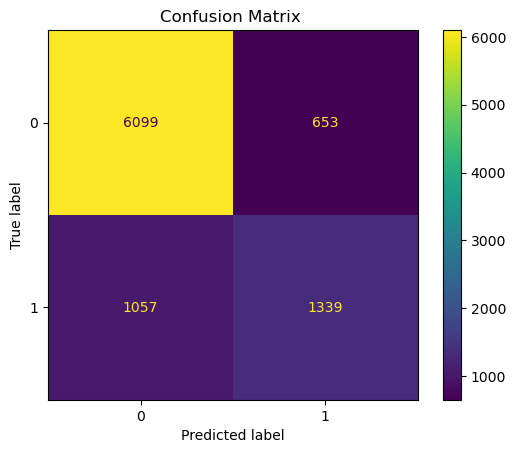

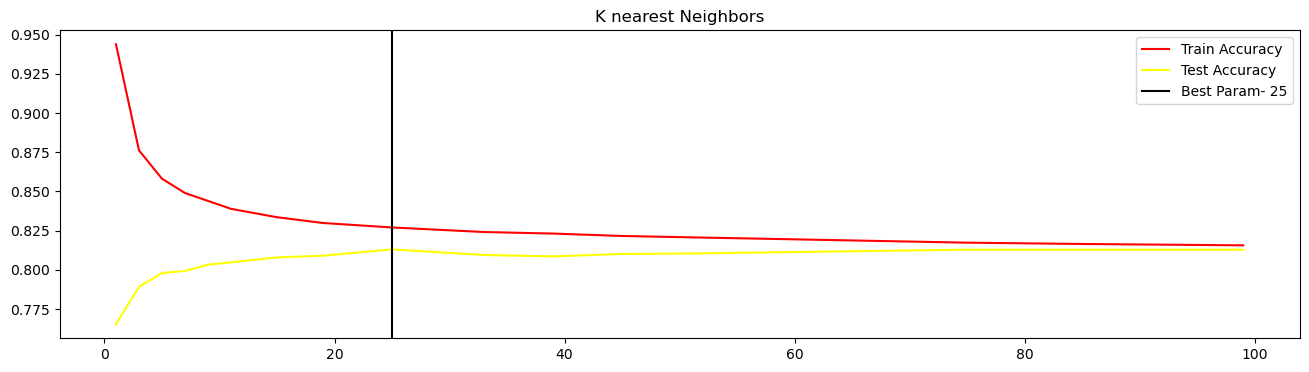

In [7]:
# Array of neighbours to be passed as a parameter
neighbours = [1,3,5,7,9,11,15,19,25,33,39,45,51,75,85,99]

# 2array to capture Accuracies
train_acc = []
test_acc = []
cm_1 = []

for k in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    knn_model.fit(X_train, y_train)
    
    # Test set
    y_test_knn = knn_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_knn)
    test_acc.append(acc_test)
    
    # Train set
    y_train_knn = knn_model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_knn)
    train_acc.append(acc_train)

    #Confusion Metrics
    cm_1.append(confusion_matrix(y_test, y_test_knn))

    
# Getting the index which has better test Accuracy
index_test = np.argmax(test_acc)

print('Best Parameter to be considered for K Nearest Neighbours is :-  {}'.format(neighbours[index_test]))
print('Best Test Accuracy for above is                             :-  {}'.format(round(test_acc[index_test]*100,1)))

print('')
print('Confusion Metrics Details Below :-')

# Display Confusion Metrics
ConfusionMatrixDisplay(confusion_matrix=cm_1[index_test]).plot()
plt.title('Confusion Matrix ')
plt.show()


# Below we are plottin the graph

plt.figure(figsize=(16, 4))

# Plot the second line with color 'red'
plt.plot(neighbours, train_acc, color='red', label='Train Accuracy')

# Plot the second line with color 'yellow'
plt.plot(neighbours, test_acc, color='yellow', label='Test Accuracy')

# Best Neighbour Value
plt.axvline( neighbours[index_test], label='Best Param- {}'.format(neighbours[index_test]), color='black')

# Add a legend to differentiate between the two lines
plt.legend()

#  Title
plt.title('K nearest Neighbors')

# Show the plot
plt.show()

## 8.2 ML - Logistic Regression <a id="8.2"></a>

Logistic Regression is a method used to predict whether something belongs to one of two categories, like "yes" or "no". It works by looking at the input data and calculating a probability for each category. Based on that probability, it decides the most likely category.  Since the Data Set is not so big so no Regulization penalty is used



Key Findings :- 


    1) Test Accuracy Overall is at 82.7 %
    
    2) Best C value is Between 1 and 10



Best Parameter to be considered for Logistic Regression is :-  1
Best Test Accuracy for above is                             :-  82.6

Confusion Metrics Details Below :-


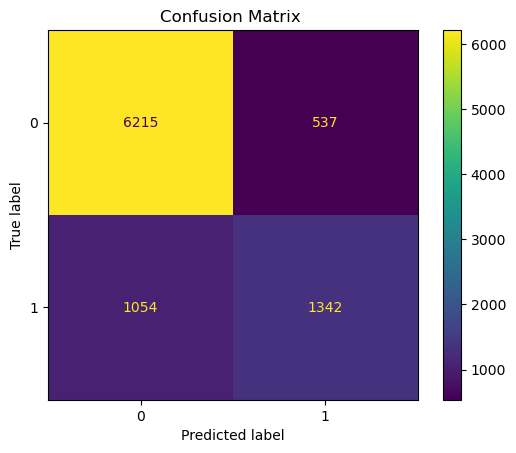

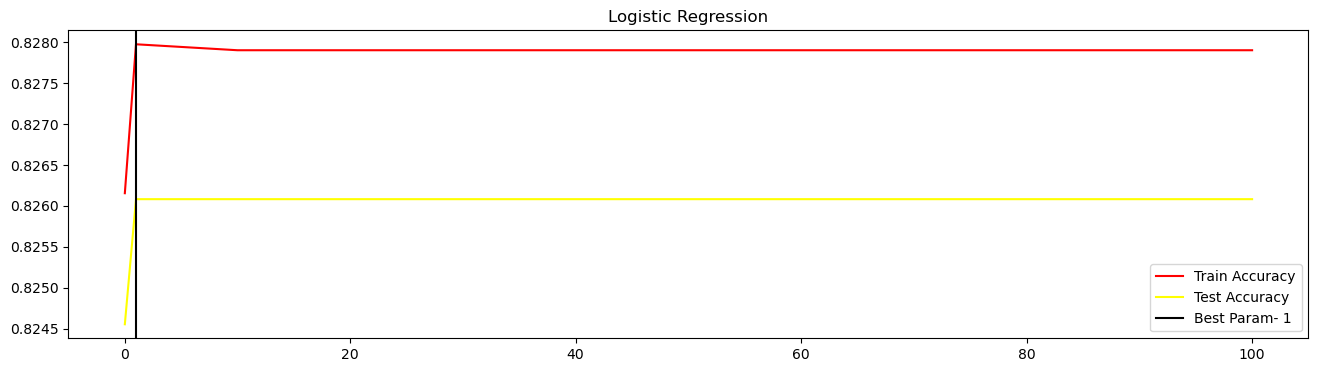

In [8]:

# Array of regularization strengths - C
#
reg_c = [0.01, 1, 10, 50, 100]

# 2array to capture Accuracies
train_acc = []
test_acc = []

cm_2 = []
for k in reg_c:
    
    log_model = LogisticRegression(C=k, max_iter=10000)
    # Fitting the Model
    log_model.fit(X_train, y_train)
    
    # Test set
    y_test_log = log_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_log)
    test_acc.append(acc_test)
    
    # Train set
    y_train_log = log_model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_log)
    train_acc.append(acc_train)
    
    #Confusion Metrics
    cm_2.append(confusion_matrix(y_test, y_test_log))


    
# Getting the index which has better test Accuracy
index_test = np.argmax(test_acc)
print('')

print('Best Parameter to be considered for Logistic Regression is :-  {}'.format(reg_c[index_test]))
print('Best Test Accuracy for above is                             :-  {}'.format(round(test_acc[index_test]*100,1)))
print('')
print('Confusion Metrics Details Below :-')

# Display Confusion Metrics
ConfusionMatrixDisplay(confusion_matrix=cm_2[index_test]).plot()
plt.title('Confusion Matrix ')
plt.show()

# Below we are plottin the graph

plt.figure(figsize=(16, 4))

# Plot the second line with color 'red'
plt.plot(reg_c, train_acc, color='red', label='Train Accuracy')

# Plot the second line with color 'yellow'
plt.plot(reg_c, test_acc, color='yellow', label='Test Accuracy')

# Best Neighbour Value
plt.axvline( reg_c[index_test], label='Best Param- {}'.format(reg_c[index_test]), color='black')

# Add a legend to differentiate between the two lines
plt.legend()

#  Title
plt.title('Logistic Regression')
# Show the plot
plt.show()



## 8.3 ML - Decision Tree <a id="8.3"></a>

A **Decision Tree** is a model that splits data into branches based on feature values to make predictions.



Key Findings :- 


    1) Test Accuracy Overall is at 83.3 %
    
    2) Best parameter can be found in the Below cells result

In [9]:
# defining the Tree Parameters
max_depth_par = [4, 8,32 , 63]
min_samples_split_par =  [2, 4, 16, 32]
min_samples_leaf_par =  [1, 2, 4, 16]

# Captring each itermations for accuracy detaisl
total_accuracy_train = {}

total_accuracy_test = {}

cm_3 = []

#Checking for the best Combination
for a in max_depth_par:
    for b in min_samples_split_par:
        for c in min_samples_leaf_par:

            dt_model = DecisionTreeClassifier(max_depth=a,min_samples_split=b,min_samples_leaf=c)
            # Fiting the Model
            
            dt_model.fit(X_train, y_train)
    
            # Test set
            y_test_dt = dt_model.predict(X_test)
            acc_test = accuracy_score(y_test, y_test_dt)
            total_accuracy_test[(a, b, c)] = acc_test

            # Train set
            y_train_dt = dt_model.predict(X_train)
            acc_train = accuracy_score(y_train, y_train_dt)
            total_accuracy_train[(a, b, c)] = acc_train
            
            # Confusion Metrics
            cm_3.append(confusion_matrix(y_test, y_test_dt))



Decision Tree
Best Accuracy is : 83.4
Best Parameter Pair Combination is for Max Depth - 8 , Min Samples Split - 32 , Min Samples per Leaf - 4
 
Confusion Metrics Details Below :-


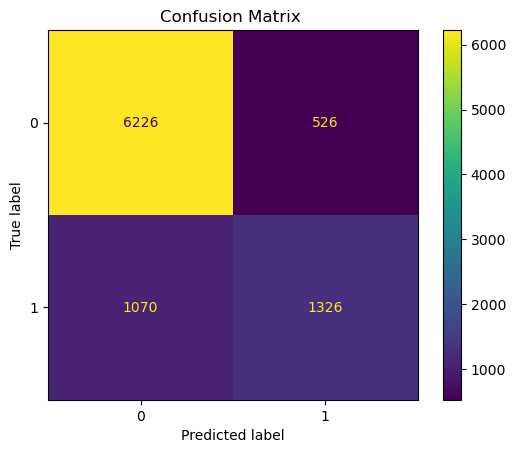

 
Out of Below Combinations :-


{(4, 2, 1): 0.8255356362046349,
 (4, 2, 2): 0.8255356362046349,
 (4, 2, 4): 0.8255356362046349,
 (4, 2, 16): 0.8252076956711849,
 (4, 4, 1): 0.8255356362046349,
 (4, 4, 2): 0.8255356362046349,
 (4, 4, 4): 0.8255356362046349,
 (4, 4, 16): 0.8252076956711849,
 (4, 16, 1): 0.8255356362046349,
 (4, 16, 2): 0.8255356362046349,
 (4, 16, 4): 0.8255356362046349,
 (4, 16, 16): 0.8252076956711849,
 (4, 32, 1): 0.825317009182335,
 (4, 32, 2): 0.825317009182335,
 (4, 32, 4): 0.825317009182335,
 (4, 32, 16): 0.8252076956711849,
 (8, 2, 1): 0.8329689549628334,
 (8, 2, 2): 0.8327503279405335,
 (8, 2, 4): 0.8329689549628334,
 (8, 2, 16): 0.8326410144293834,
 (8, 4, 1): 0.8330782684739834,
 (8, 4, 2): 0.8327503279405335,
 (8, 4, 4): 0.8329689549628334,
 (8, 4, 16): 0.8326410144293834,
 (8, 16, 1): 0.8332968954962834,
 (8, 16, 2): 0.8332968954962834,
 (8, 16, 4): 0.8329689549628334,
 (8, 16, 16): 0.8326410144293834,
 (8, 32, 1): 0.8329689549628334,
 (8, 32, 2): 0.8329689549628334,
 (8, 32, 4): 0.8335155

In [10]:
# 
print('Decision Tree')
print('Best Accuracy is : {}'.format( round(  total_accuracy_test[max(total_accuracy_test, key=total_accuracy_test.get)]*100,1)))

a,b,c = max(total_accuracy_test, key=total_accuracy_test.get)
print('Best Parameter Pair Combination is for Max Depth - {} , Min Samples Split - {} , Min Samples per Leaf - {}'.format(a,b,c))
print (' ')

print('Confusion Metrics Details Below :-')

# Display Confusion Metrics
ConfusionMatrixDisplay(confusion_matrix=cm_3[index_test]).plot()
plt.title('Confusion Matrix ')
plt.show()



print (' ')
print ('Out of Below Combinations :-')
total_accuracy_test

## 8.4 ML - Key Findings <a id="8.4"></a>


   - 1) All the Models have accuracy > 80 %. Logistic Regression and Decision Tree generally outperforming K-Nearest Neighbors. This indicates that the models can predict the income class (<=50K or >50K) with reasonable success.
   - 2) Decision tree is the Best out of three with 83.3 % Accuracy
               
   - 3) The confusion matrix shows that Logistic Regression and Decision Tree classify the majority class (<=50K) accurately but struggled with the minority class (>50K) where almost 50 % of the time it was classfied wrongly
   
   - 4) The Decision Tree and Logistic Regression models had fewer false negatives (predicting <=50K when it was actually >50K), which is important for capturing high-income individuals. However, there were slightly more false positives.
   
  

## 8.5 ML - DrawBacks /Next Steps  <a id="8.5"></a>


   - 1) All models may suffer from the imbalanced nature of the target variable, leading to poor predictions for the minority class (>50K income group).
               
   - 2) The models are not  fully utilizing feature interactions, which could reveal hidden relationships between variables such as education, workclass, and hours-per-week.
   
   - 3) *Improvements* : Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset or apply class weighting in the models to give more weight to the minority class. You could also use precision-recall metrics rather than accuracy to assess model performance for imbalanced data.
   
  - 4) *Improvements* : Perform additional feature engineering to create interaction terms or bin continuous features into meaningful groups.
  
  - 5) *Improvements* : Explore Unused Features like - 'education_num','capital-loss','native-country','relationship'
  
  - 6) *Improvements* : Exploring more Advanced ML methods like XGBoost